In [1134]:
#Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1135]:
#Cargamos el  dataset de airbnb
df = pd.read_csv('airbnb-listings-extract.csv', sep=';')

# Exploratory Data Analysis 
Primero vamos a empezar viendo cuantos datos tenemos, los tipos, columnas que podemos desde ya eliminar, etc.

In [1136]:
#Veamos la dimensión de los datos
print('Dimensión:', df.shape)

Dimensión: (14780, 89)


In [1137]:
#Veamos también información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [1138]:
df.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [1139]:
df.describe()


,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [1140]:
#Veamos que columnas tenemos para hacernos una idea de en cuales podriamos enfocarnos más y cuales descartar
print(df.columns)                                                                                                                                                                       

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Desde ya puedo ver ciertas cosas que puedo empezar a hacer, dado que conocemos la pregunta o el problema que queremos resolver (predecir el valor de una casa), podemos eliminar ciertas columnas que son irrelevantes, como URLs, IDs, entre otras.


In [1141]:
df.groupby('Country')['ID'].count().sort_values(ascending=False).reset_index()

,Country,ID
0,Spain,14001
1,United States,184
2,United Kingdom,159
3,France,110
4,Italy,68
5,Australia,46
6,Ireland,45
7,Germany,41
8,Austria,31
9,Netherlands,26


Veo además que el dataset cuenta en su mayoría con datos de España, por lo que voy a delimitar el modelo a ese país.

In [1142]:
print('Registros antes: ',df.shape[0] )

#Eliminamos registros que no sean de España
df = df[df['Country'] == 'Spain']

print('Registros después: ',df.shape[0] )

Registros antes:  14780
Registros después:  14001


Ahora vamos a eliminar columnas que en definitiva no aportan nada. 

In [1143]:
cols_to_drop = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Latitude', 'Longitude', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Location', 'Host About', 'Experiences Offered', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Response Time', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Experiences Offered', 'Neighbourhood', 'Neighbourhood Cleansed', 'First Review', 'Last Review', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Geolocation', 'Amenities', 'Review Scores Accuracy', 'Weekly Price', 'Monthly Price', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped',  'License', 'Jurisdiction Names', 'Features', 'Calculated host listings count']

In [1144]:
print('Dimensión antes:', df.shape)

#Eliminamos las columnas que no necesitamos
df.drop(columns=cols_to_drop, inplace=True)

print('Dimensión después:', df.shape)

Dimensión antes: (14001, 89)
Dimensión después: (14001, 24)


In [1145]:
df.columns

Index(['Host Since', 'Host Response Rate', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Reviews per Month'],
      dtype='object')

Veamos la distrubución de los precios

<Axes: ylabel='Price'>

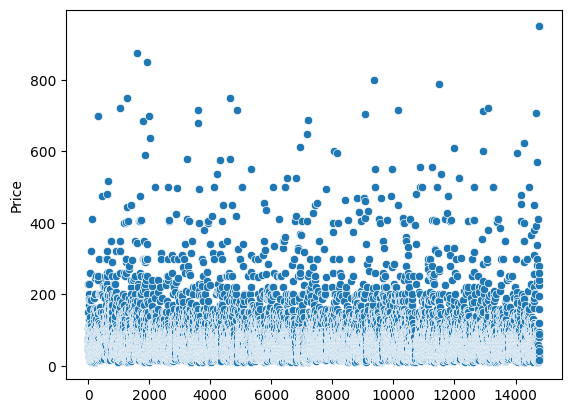

In [1146]:
sns.scatterplot(df['Price'])

<Axes: ylabel='Price'>

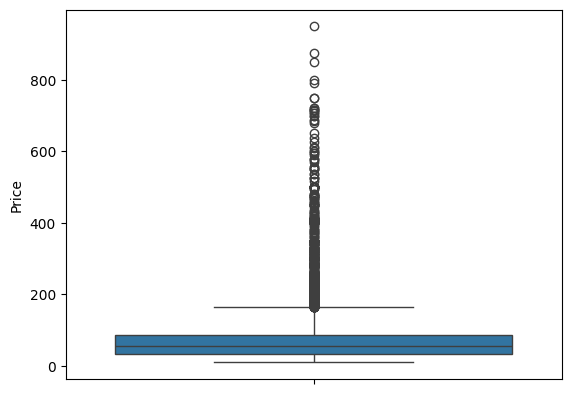

In [1147]:
sns.boxplot(df['Price'])

Vemos ciertos valores atipicos que podrían sesgar nuestro modelo

In [1148]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

df = df[(df['Price'] > rango_inferior) & (df['Price'] < rango_superior)]

<Axes: ylabel='Price'>

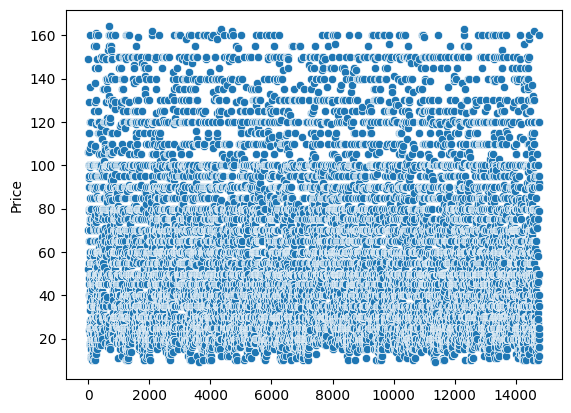

In [1149]:
sns.scatterplot(df['Price'])

Vamos a revisar qué características tienen datos faltantes, y dependiendo el caso procedemos con la imputación o eliminación

In [1150]:
df.isna().sum().rename('Total_Nulos').reset_index().sort_values(by='Total_Nulos', ascending=False)

,index,Total_Nulos
9,Square Feet,12611
11,Security Deposit,7603
12,Cleaning Fee,5458
21,Review Scores Value,2818
20,Review Scores Location,2817
18,Review Scores Checkin,2814
19,Review Scores Communication,2799
17,Review Scores Cleanliness,2797
16,Review Scores Rating,2786
23,Reviews per Month,2665


Curiosamente la característica más imporntate como es el tamaño en metros cuadrados de la casa, en más de un 95% de nuestro registro tiene valores faltantes, por lo que imputarla es casi imposible, a diferencia de otras filas que tienen pocos valores que podrian ser rellenados con la media o la mediana.
Por lo que vamos a eliminar ciertas variables que como tienen demasiados nulos, la imputación podria alterar los datos y no ajustarse bien a la distribución real 

In [1151]:
#Eliminamos Square Feet
df.drop(columns=['Square Feet', 'Security Deposit', 'Cleaning Fee'], inplace=True)

In [1152]:
total_nulos = df.isna().sum().rename('Total_Nulos').reset_index().sort_values(by='Total_Nulos', ascending=False)
total_nulos

,index,Total_Nulos
18,Review Scores Value,2818
17,Review Scores Location,2817
15,Review Scores Checkin,2814
16,Review Scores Communication,2799
14,Review Scores Cleanliness,2797
13,Review Scores Rating,2786
20,Reviews per Month,2665
1,Host Response Rate,1625
7,Beds,46
5,Bathrooms,45


Realizamos la imputación de valores faltantes


In [1153]:
columnas_imputar = [row[1]['index'] for row in total_nulos.iterrows() if row[1]['Total_Nulos'] > 0]

In [1154]:
for col in columnas_imputar:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [1155]:
df.isna().sum().rename('Total_Nulos').reset_index().sort_values(by='Total_Nulos', ascending=False)

,index,Total_Nulos
0,Host Since,0
1,Host Response Rate,0
2,Property Type,0
3,Room Type,0
4,Accommodates,0
5,Bathrooms,0
6,Bedrooms,0
7,Beds,0
8,Bed Type,0
9,Price,0


Ahora que no tenemos valores faltantes vamos  a transformar las variables categoricas

In [1156]:
#Vamos a transformar la columna que contiene las fechas desde que el host creo su cuenta a una columna de tipo datetime
df['Host Since'] = pd.to_datetime(df['Host Since'])

#Creamos una nueva columna la cual tenga los años de actividad del host
df['Host Years'] = ((pd.to_datetime('today') - df['Host Since'])).dt.days // 365

#Eliminamos la columna Host Since
df.drop(columns='Host Since', inplace=True)

In [1157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13138 entries, 1 to 14771
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           13138 non-null  float64
 1   Property Type                13138 non-null  object 
 2   Room Type                    13138 non-null  object 
 3   Accommodates                 13138 non-null  int64  
 4   Bathrooms                    13138 non-null  float64
 5   Bedrooms                     13138 non-null  float64
 6   Beds                         13138 non-null  float64
 7   Bed Type                     13138 non-null  object 
 8   Price                        13138 non-null  float64
 9   Guests Included              13138 non-null  int64  
 10  Extra People                 13138 non-null  int64  
 11  Number of Reviews            13138 non-null  int64  
 12  Review Scores Rating         13138 non-null  float64
 13  Review Scores Cleanli

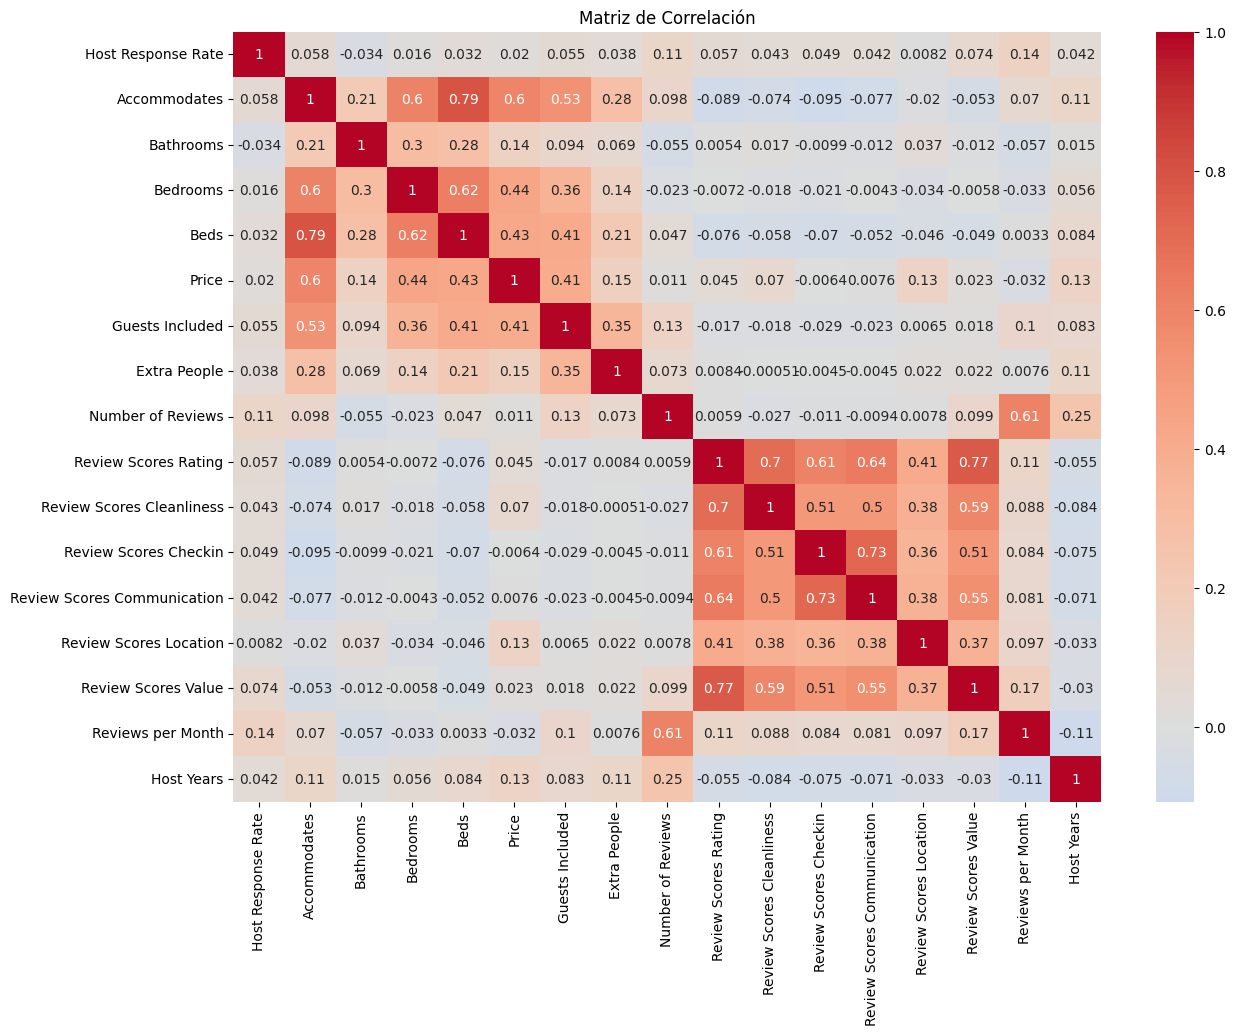

In [1158]:
corr_mtx = df.select_dtypes(exclude='object').corr()


plt.figure(figsize=(14, 10))  
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm',center=0)

plt.title('Matriz de Correlación')
plt.show()



Si definimos un umbral de .9 como alta colinealidad entre variables, podemos concluir que ninguna variable esta altamente correlacionada con otra

Ahora vamos a transformar cada variable categorica a una númerica usando una codificación one hot, debido a que no son muchos grupos y no habría demasiada dimensiones

In [1159]:
i = 0
for col in df.columns:
    if df[col].dtype == 'object':
        suma = df[col].nunique()
        print(col, ': ', suma)
        i += suma

print('Total de grupos únicos:', i)

Property Type :  22
Room Type :  3
Bed Type :  5
Cancellation Policy :  5
Total de grupos únicos: 35


In [1160]:
df = pd.get_dummies(df, columns=['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy'], drop_first=True)

In [1161]:
df.shape

(13138, 48)

Ahora vamos a utilizar una regresión Lasso para seleccionar las variables más importantes

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.20691380811147897; total time=   0.0s
[CV] END ..........................alpha=0.20691380811147897; total time=   0.0s
[CV] END ..........................alpha=0.20691380811147897; total time=   0.0s
[CV] END ..........................alpha=0.20691380811147897; total time=   0.0s
[CV] END ..........................alpha=0.20691380811147897; total time=   0.0s
[CV] END ..........................alpha=0.42813323987193935; total time=   0.0s
[CV] END ..........................alpha=0.4281

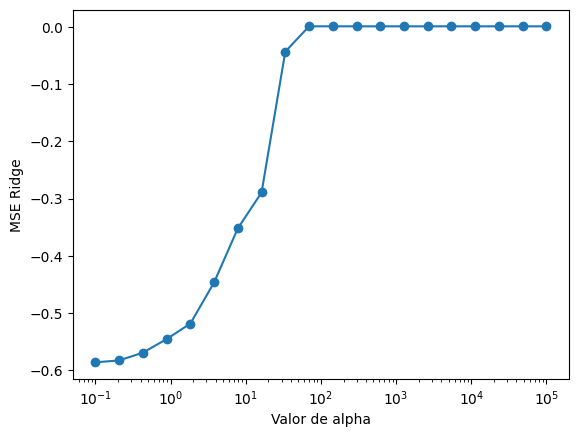

In [1162]:
#Importamos Lasso, train_test_split y GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

#Dividimos las features de la columna objetivo
X, y = df.drop(columns='Price'), df['Price']

#Ahora los sets de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


alpha_vector = np.logspace(-1,5,20)

param_grid = {
    'alpha': alpha_vector 
}

#Instanciamos GridSearchCV
grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, verbose=2)

grid.fit(X_train, y_train)

print(f"Mejor valor para alpha: {grid.best_params_['alpha']}")

best_lasso = grid.best_estimator_

test_score = best_lasso.score(X_test, y_test)

print(f"Puntuación de lasso con el conjunto de prueba: {test_score}")

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('Valor de alpha')
plt.ylabel('MSE Ridge')
plt.show()


In [1163]:
#Creamos un modelo de Lasso con el mejor alpha
lasso = Lasso(alpha=grid.best_params_['alpha'])

#Lo entrenamos
lasso.fit(X_train, y_train)

#Guardamos los coeficientes de cada variable predictora
coef = lasso.coef_


#Creamos un nuevo dataframe que contenga solo las variables que influyan en el precio 
relevant_cols = [column for column, coefficient in zip(df.columns, coef) if coefficient != 0]
df_clean = df[relevant_cols]

In [1164]:
df.shape, df_clean.shape

((13138, 48), (13138, 21))

In [1165]:
#Importamos una regresión lineal
from sklearn.linear_model import LinearRegression

#Separamos en conjunto de prueba y entrenamiento de nuestra dataframe filtrado
X, y = df_clean.drop(columns='Price'), df_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [1166]:
#Predecimos
preds = lr.predict(X_test)

In [1167]:
#Importamos algunas métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, preds), mean_squared_error(y_test, preds)

(16.07520862581468, 467.68769941116966)

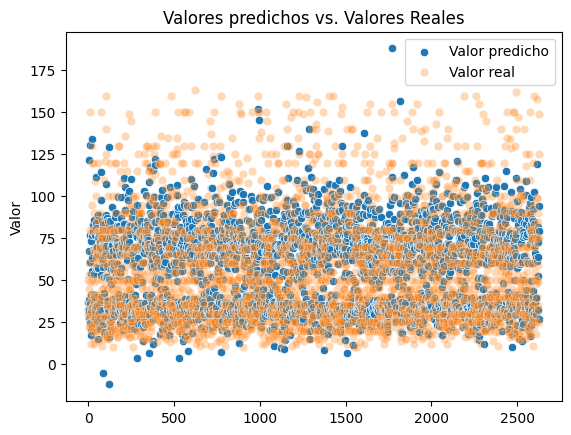

In [1168]:
#Ploteamos el valor vs el valor predicho
sns.scatterplot(x=range(len(preds)), y=preds, label='Valor predicho')
sns.scatterplot(x=range(len(y_test)), y=y_test, label='Valor real', alpha=0.3)


plt.ylabel('Valor')
plt.title('Valores predichos vs. Valores Reales')
plt.legend()

plt.show()


Por ultimo vamos a probarlo con diferentes modelos

In [1169]:
#Importamos otros modelos y una nueva métrica
from sklearn.linear_model import  Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

#Definimos un diccionario con los modelos y sus respectivos hiperparametros a testear
modelos = {
    'Ridge': (Ridge(), {'alpha': np.logspace(-4, 1, 10)}),
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None]
    }),
    'GradientBoosting': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    })
}

#Definimos un dict vacio donde se almacenaran los modelos con los mejores rendimientos
best_models = {}

#Creamos un bucle para hacer las pruebas
for name, (model, params) in modelos.items():
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    
    best_models[name] = grid_search.best_estimator_
    
    
    y_pred = best_models[name].predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    
    print(f" Mejores hiperparametros para {name}: {grid_search.best_params_}")
    print(f" MAE: {mae:.2f}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R² Score: {r2:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Mejores hiperparametros para Ridge: {'alpha': np.float64(0.21544346900318845)}
 MAE: 16.07
 MSE: 467.39
 RMSE: 21.62
 R² Score: 0.5863
Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Mejores hiperparametros para RandomForest: {'max_depth': 20, 'n_estimators': 200}
 MAE: 14.13
 MSE: 391.75
 RMSE: 19.79
 R² Score: 0.6533
Fitting 5 folds for each of 27 candidates, totalling 135 fits
 Mejores hiperparametros para GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
 MAE: 13.55
 MSE: 358.21
 RMSE: 18.93
 R² Score: 0.6830
Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Mejores hiperparametros para SVR: {'C': 10, 'epsilon': 0.01}
 MAE: 20.10
 MSE: 744.08
 RMSE: 27.28
 R² Score: 0.3415


### Podemos concluir que el mejor modelo para los datos seleccionados es el modelo de GradientBoosting, al menos eso es lo que nos indican los resultados en términos absolutos, seguido del Random Forest. En cambio los otros dos no capturan correctamente los datos como sí lo hacen los modelos basados en arboles. Tal vez si tuvieramos mejores datos y un mayor analisis más a profundidad + el uso de modelos más avanzados como un XGBoost hubieramos obtenido mejores resultados.